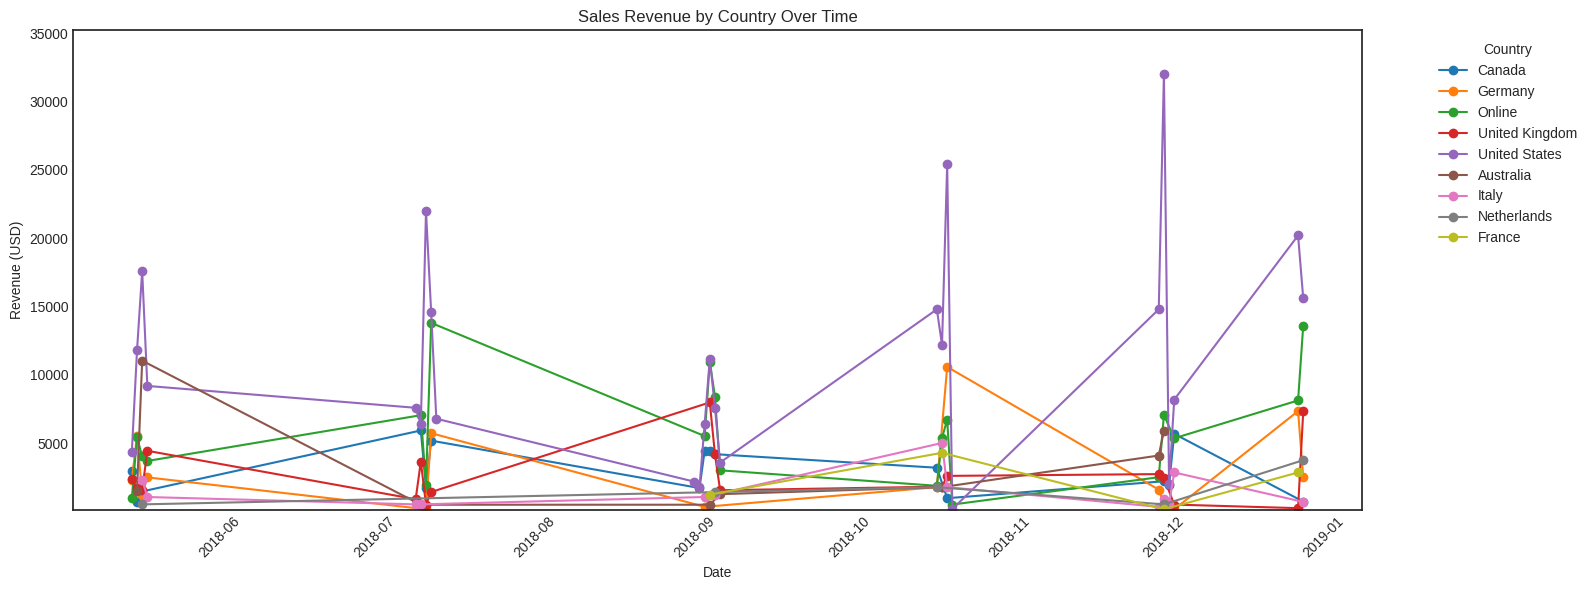

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sales_df = pd.read_excel('/content/drive/My Drive/sales.xlsx')
stores_df = pd.read_excel('/content/drive/My Drive/stores.xlsx')
exchange_df = pd.read_excel('/content/drive/My Drive/exchange rate.xlsx')
customers_df = pd.read_excel('/content/drive/My Drive/customers.xlsx')
products_df = pd.read_excel('/content/drive/My Drive/products.xlsx')

merged_df = sales_df.merge(stores_df, left_on='StoreKey', right_on='StoreKey', how='left')
merged_df = merged_df.merge(exchange_df, left_on='Currency_Code', right_on='Currency', how='left')
merged_df['revenue_usd'] = merged_df['Quantity'] * merged_df['Exchange']

revenue_by_country = merged_df.groupby(['Order_Date', 'Country'])['revenue_usd'].sum().reset_index()

plt.figure(figsize=(16, 6))
plt.style.use('seaborn-v0_8-white')

for country in revenue_by_country['Country'].unique():
    country_data = revenue_by_country[revenue_by_country['Country'] == country].sort_values('Order_Date')
    plt.plot(country_data['Order_Date'], country_data['revenue_usd'], label=country, marker='o')

plt.title('Sales Revenue by Country Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue (USD)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(False)

y_min = revenue_by_country['revenue_usd'].min()
y_max = revenue_by_country['revenue_usd'].max()
plt.ylim(y_min * 0.9, y_max * 1.1)

plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()




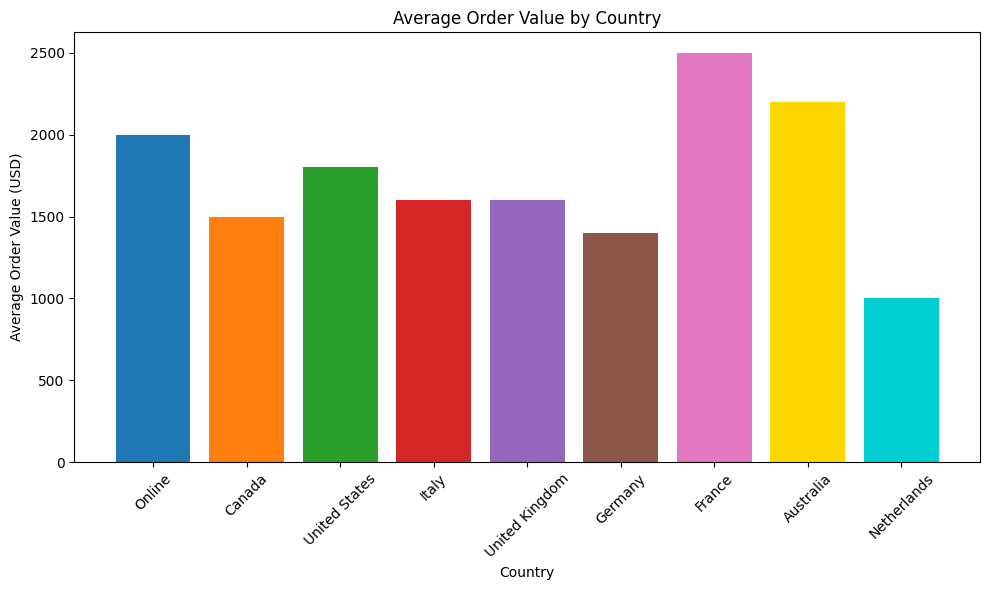

In [ ]:
import matplotlib.pyplot as plt

countries = [
    "Online", "Canada", "United States", "Italy",
    "United Kingdom", "Germany", "France", "Australia", "Netherlands"
]
values = [2000, 1500, 1800, 1600, 1600, 1400, 2500, 2200, 1000]


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#FFD700', '#00CED1']  # Gold for Australia, Turquoise for Netherlands


plt.figure(figsize=(10, 6))
plt.bar(countries, values, color=colors)
plt.title('Average Order Value by Country')
plt.xlabel('Country')
plt.ylabel('Average Order Value (USD)')
plt.xticks(rotation=45)
plt.tight_layout()


plt.savefig("bar_chart_updated_colors.png")
plt.show()

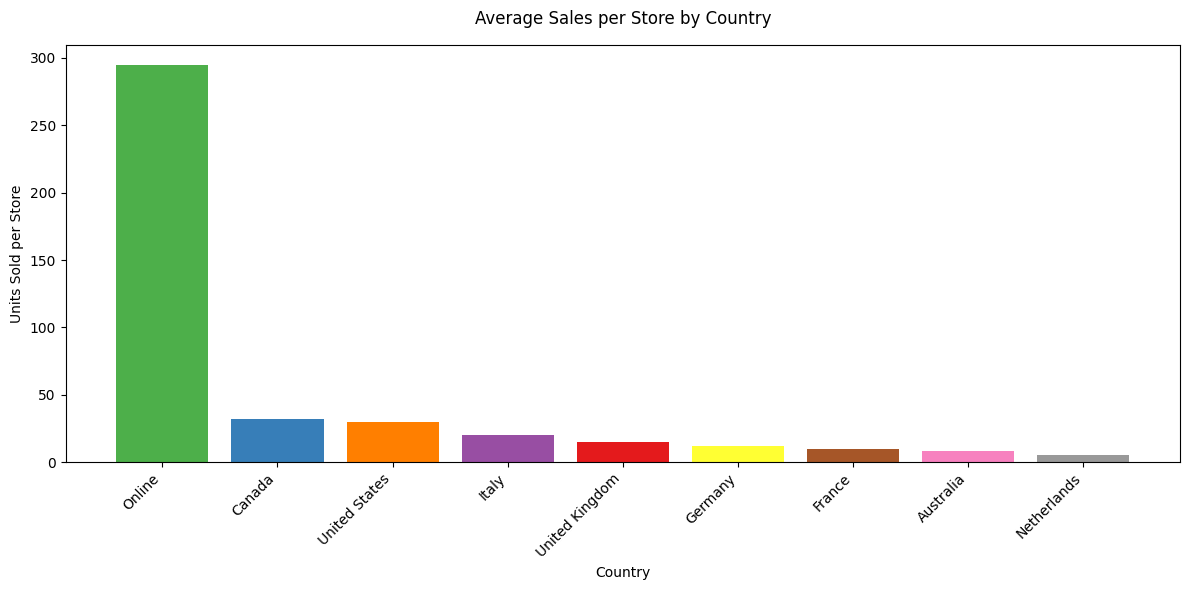

In [ ]:
import matplotlib.pyplot as plt


countries = ['Online', 'Canada', 'United States', 'Italy', 'United Kingdom',
             'Germany', 'France', 'Australia', 'Netherlands']
sales = [295, 32, 30, 20, 15, 12, 10, 8, 5]


colors = ['#4daf4a', '#377eb8', '#ff7f00', '#984ea3', '#e41a1c',
          '#ffff33', '#a65628', '#f781bf', '#999999']

plt.figure(figsize=(12, 6))
plt.bar(countries, sales, color=colors)
plt.title('Average Sales per Store by Country', pad=15)
plt.xlabel('Country')
plt.ylabel('Units Sold per Store')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

filename = 'sales.xlsx'
search_path = '/content/drive/My Drive'
file_path = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path = os.path.join(root, filename)
        break
    df = pd.read_excel(file_path)

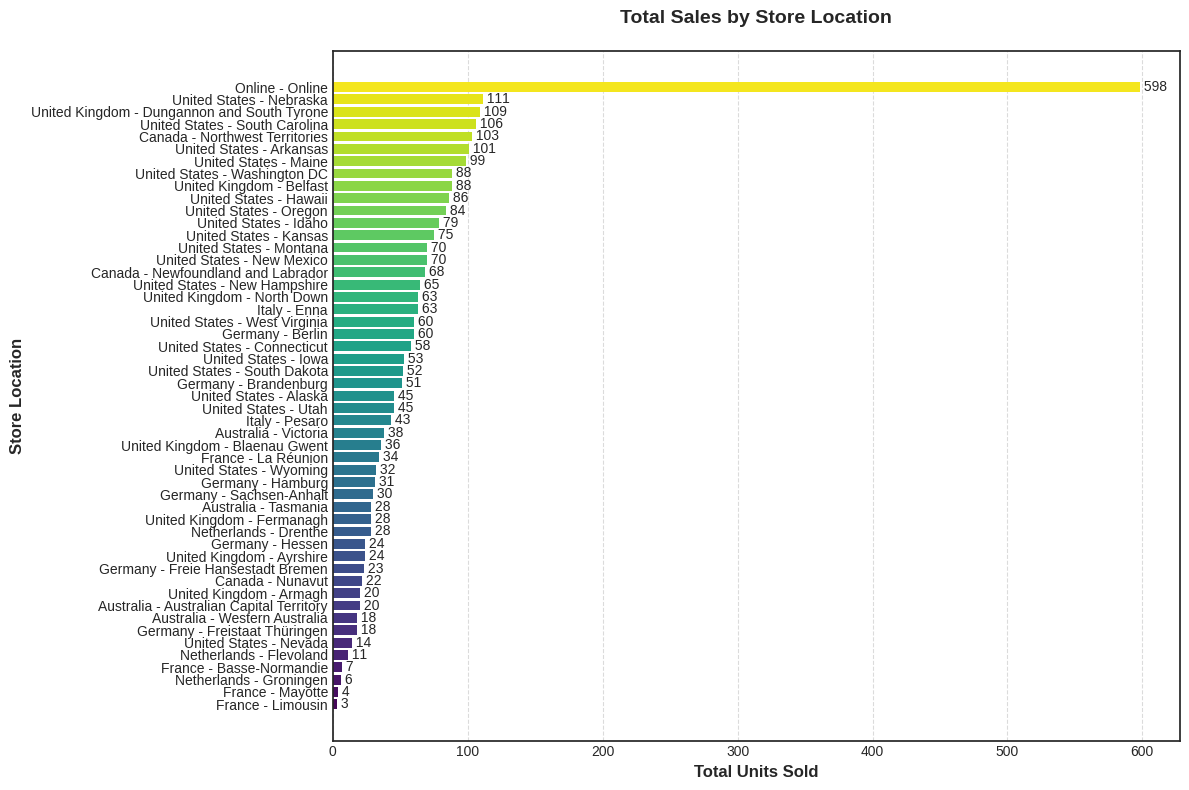

Store Performance Analysis:
Number of stores: 51
Top 3 Performing Stores:
Online - Online: 598 units
United States - Nebraska: 111 units
United Kingdom - Dungannon and South Tyrone: 109 units
Bottom 3 Performing Stores:
France - Limousin: 3 units
France - Mayotte: 4 units
Netherlands - Groningen: 6 units
Average units sold per store: 60.6


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_sales = pd.read_excel('/content/drive/My Drive/sales.xlsx', nrows=1000)
df_stores = pd.read_excel('/content/drive/My Drive/stores.xlsx', nrows=1000)

total_sales_by_store = df_sales.groupby('StoreKey')['Quantity'].sum().reset_index()


sales_with_location = pd.merge(total_sales_by_store,
                              df_stores[['StoreKey', 'Country', 'State']],
                              on='StoreKey',
                              how='left')


sales_with_location['Store_Label'] = sales_with_location['Country'] + ' - ' + sales_with_location['State']


sales_with_location = sales_with_location.sort_values('Quantity', ascending=True)


plt.figure(figsize=(12, 8))
bars = plt.barh(sales_with_location['Store_Label'],
                sales_with_location['Quantity'],
                color=sns.color_palette("viridis", n_colors=len(sales_with_location)))

plt.title('Total Sales by Store Location', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Total Units Sold', fontsize=12, fontweight='bold')
plt.ylabel('Store Location', fontsize=12, fontweight='bold')


for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f' {int(width)}',
             ha='left', va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


print("\
Store Performance Analysis:")
print(f"Number of stores: {len(sales_with_location)}")
print("\
Top 3 Performing Stores:")
top_3 = sales_with_location.nlargest(3, 'Quantity')
for _, store in top_3.iterrows():
    print(f"{store['Store_Label']}: {int(store['Quantity'])} units")

print("\
Bottom 3 Performing Stores:")
bottom_3 = sales_with_location.nsmallest(3, 'Quantity')
for _, store in bottom_3.iterrows():
    print(f"{store['Store_Label']}: {int(store['Quantity'])} units")

print(f"\
Average units sold per store: {sales_with_location['Quantity'].mean():.1f}")

In [ ]:
!pip install python-calamine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.9/856.9 kB 17.3 MB/s eta 0:00:00


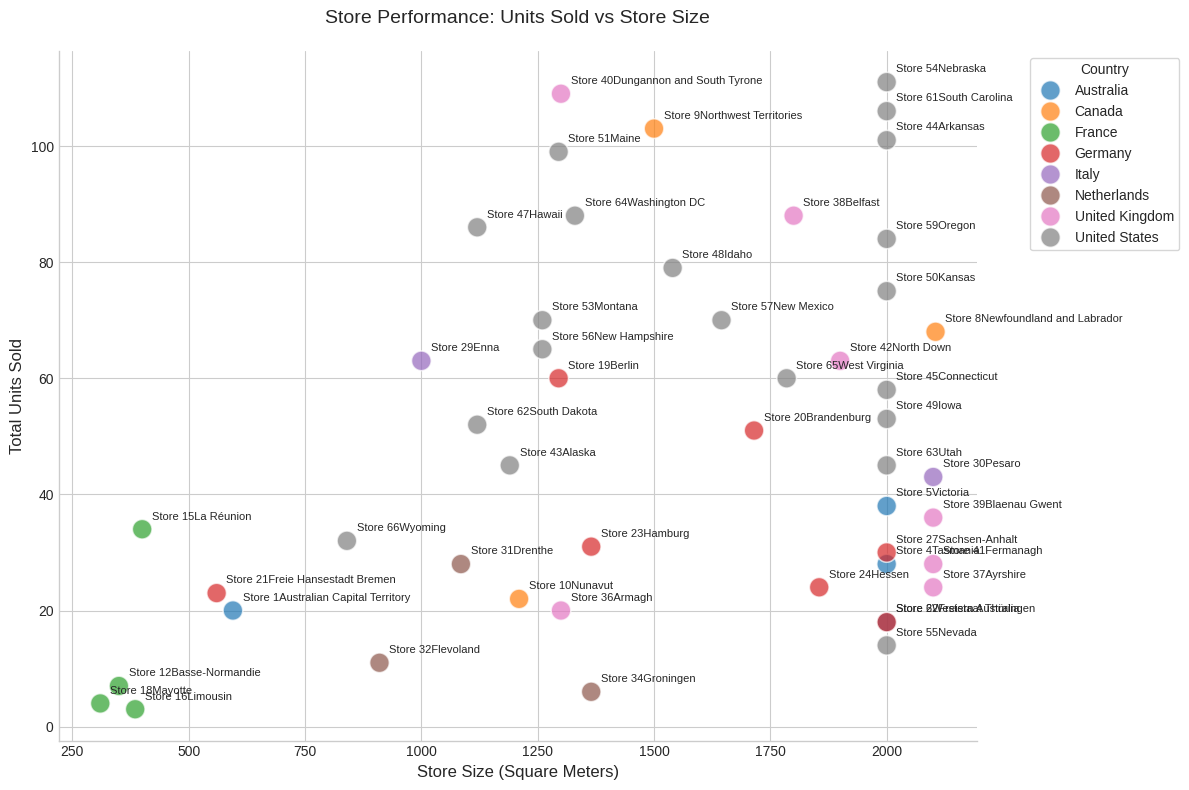

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

sales_df = pd.read_excel('/content/drive/My Drive/sales.xlsx')
stores_df = pd.read_excel('/content/drive/My Drive/stores.xlsx')
exchange_df = pd.read_excel('/content/drive/My Drive/exchange rate.xlsx')
customers_df = pd.read_excel('/content/drive/My Drive/customers.xlsx')
products_df = pd.read_excel('/content/drive/My Drive/products.xlsx')

sales_by_store = sales_df.merge(stores_df, on='StoreKey', how='left')

store_performance = sales_by_store.groupby(['StoreKey', 'Country', 'State', 'Square_Meters']).agg({
    'Quantity': 'sum'
}).reset_index()

store_performance['Sales_Density'] = store_performance['Quantity'] / store_performance['Square_Meters']

plt.style.use('seaborn-v0_8-whitegrid')



plt.figure(figsize=(12, 8), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

scatter = sns.scatterplot(data=store_performance,
                x='Square_Meters',
                y='Quantity',
                hue='Country',
                s=200,
                alpha=0.7)

plt.title('Store Performance: Units Sold vs Store Size', fontsize=14, pad=20)
plt.xlabel('Store Size (Square Meters)', fontsize=12)
plt.ylabel('Total Units Sold', fontsize=12)

for idx, row in store_performance.iterrows():
    plt.annotate(f"Store {row['StoreKey']}\
{row['State']}",
                (row['Square_Meters'], row['Quantity']),
                xytext=(7, 7),
                textcoords='offset points',
                fontsize=8)


plt.legend(bbox_to_anchor=(1.05, 1),
          loc='upper left',
          frameon=True,
          title='Country')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


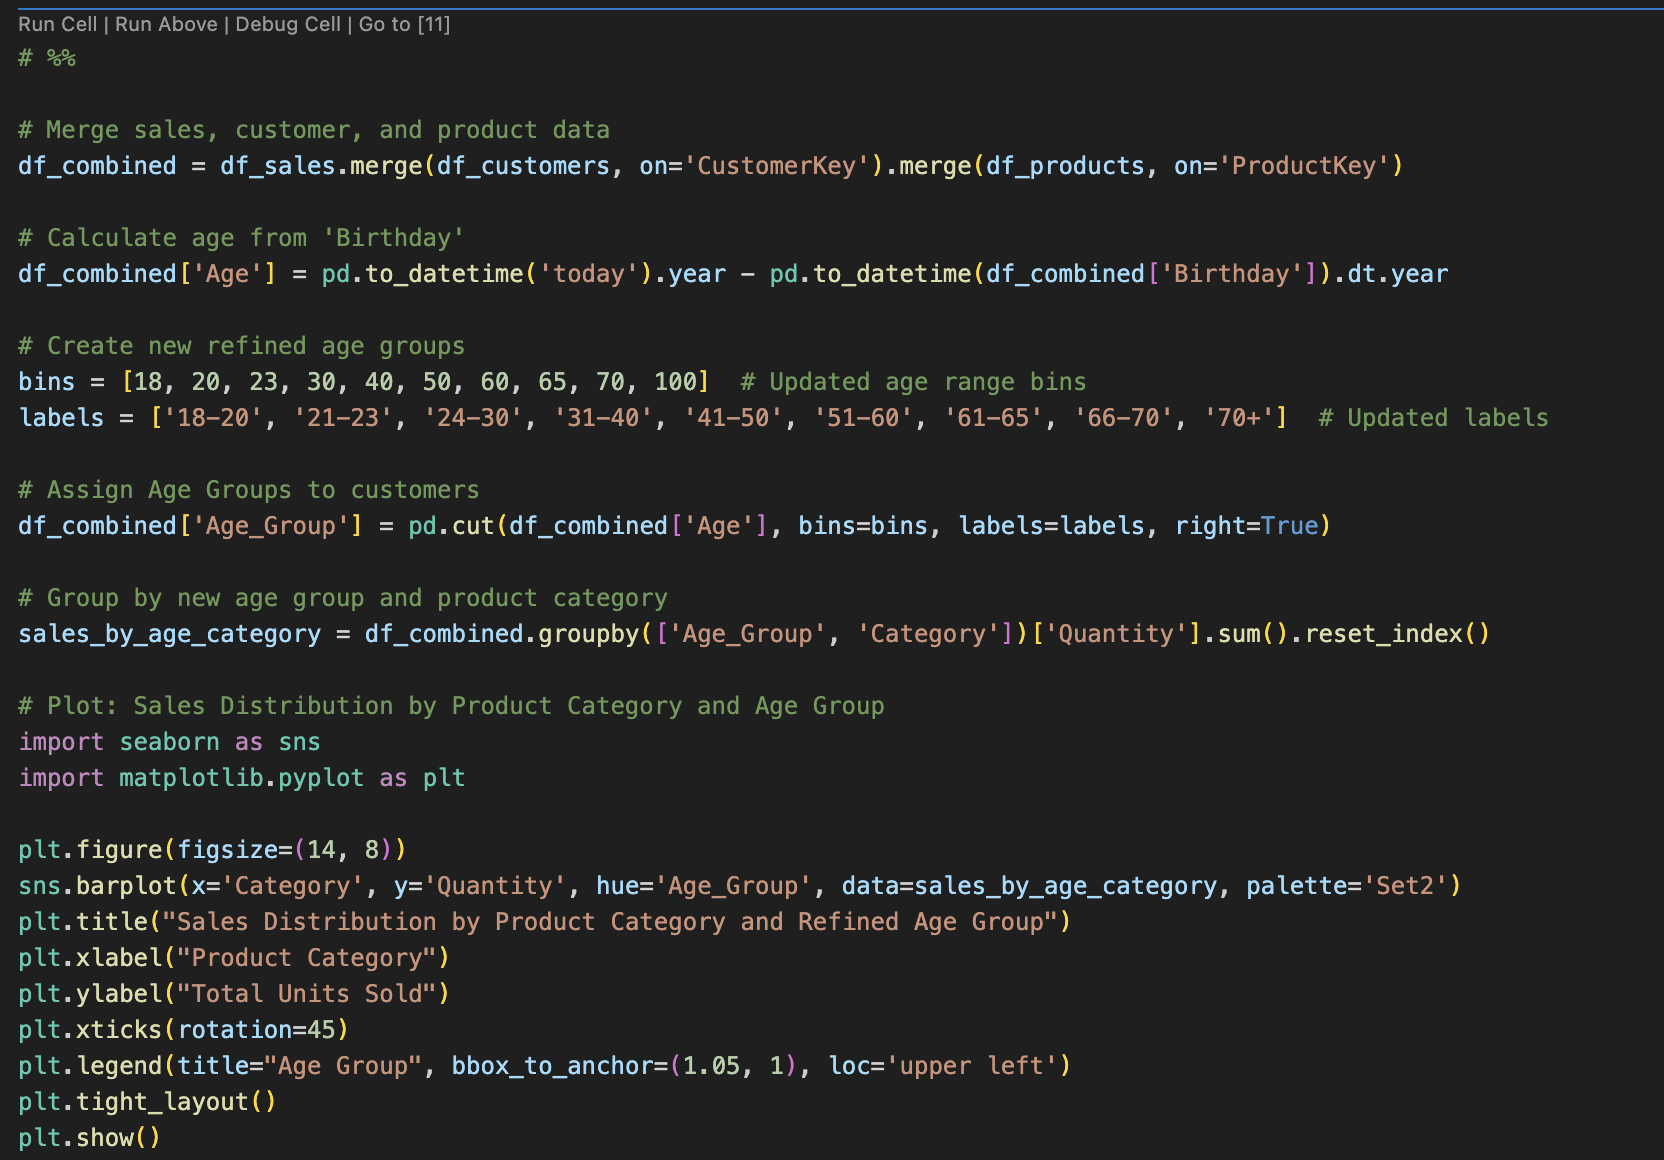

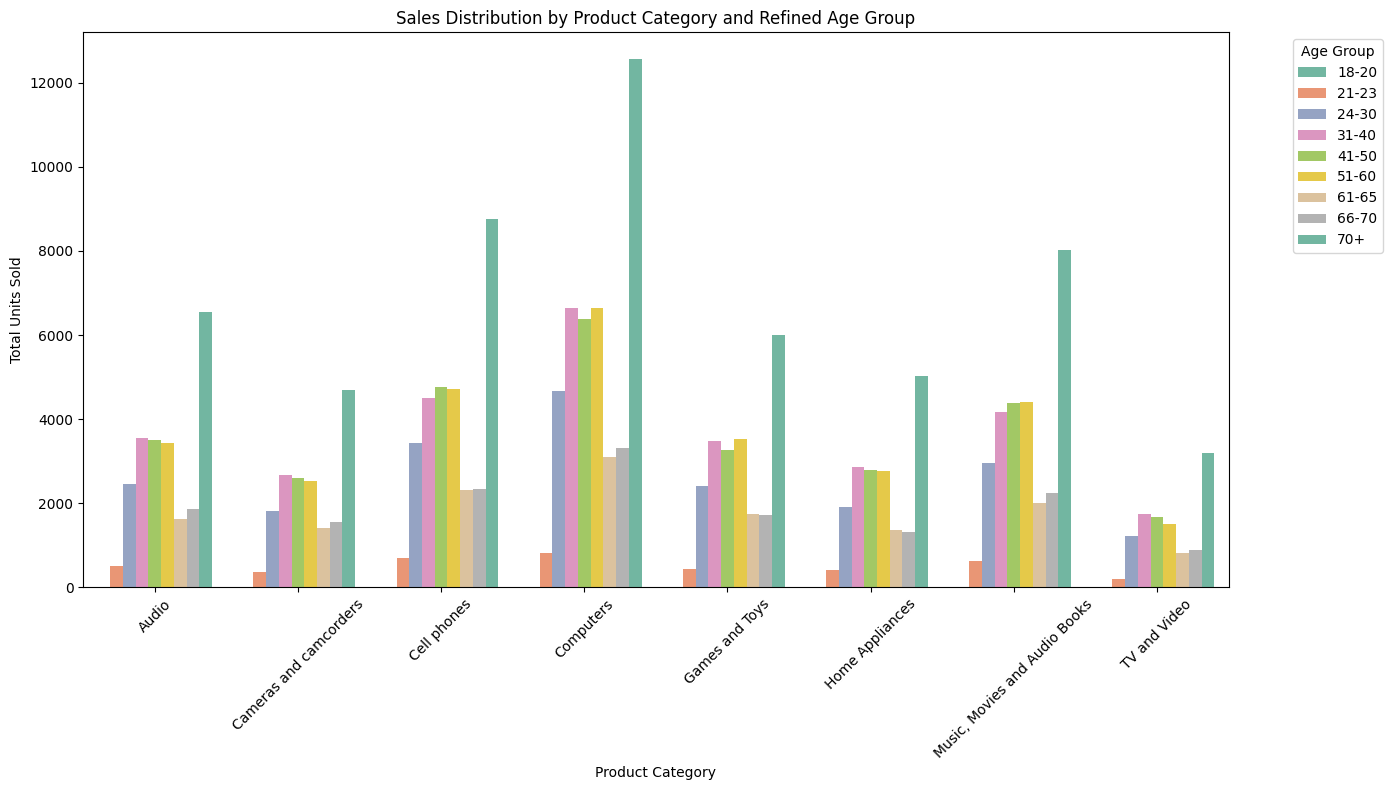

In [ ]:
!pip install pyodbc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.0/336.0 kB 6.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pyodbc
import os

In [ ]:
import pyodbc
import pandas as pd

# Set up connection
conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=johndroescher.com;"
    "DATABASE=Fall_2024;"
    "UID=StarlynSosa85;"
    "PWD=CCny23884885"
)
print("Connection successful!")

# Query and retrieve data from dbo.proj_customers
df_customers = pd.read_sql_query("SELECT * FROM dbo.proj_customers", conn)
print("Data from proj_customers retrieved:")
print(df_customers.head())

# Query and retrieve data from dbo.proj_data_dictionary
df_data_dictionary = pd.read_sql_query("SELECT * FROM dbo.proj_data_dictionary", conn)
print("Data from proj_data_dictionary retrieved:")
print(df_data_dictionary.head())

# Query and retrieve data from dbo.proj_exchange_rates
df_exchange_rates = pd.read_sql_query("SELECT * FROM dbo.proj_exchange_rates", conn)
print("Data from proj_exchange_rates retrieved:")
print(df_exchange_rates.head())

# Query and retrieve data from dbo.proj_products
df_products = pd.read_sql_query("SELECT * FROM dbo.proj_products", conn)
print("Data from proj_products retrieved:")
print(df_products.head())

# Query and retrieve data from dbo.proj_sales
df_sales = pd.read_sql_query("SELECT * FROM dbo.proj_sales", conn)
print("Data from proj_sales retrieved:")
print(df_sales.head())

# Query and retrieve data from dbo.proj_stores
df_stores = pd.read_sql_query("SELECT * FROM dbo.proj_stores", conn)
print("Data from proj_stores retrieved:")
print(df_stores.head())

# Close the connection after all queries
conn.close()

In [ ]:
df_sales = pd.read_excel('/content/drive/My Drive/sales 1.xlsx', nrows=1000)
df_stores = pd.read_excel('/content/drive/My Drive/stores.xlsx', nrows=1000)
df_customers = pd.read_excel('/content/drive/My Drive/customers.xlsx', nrows=1000)
df_products = pd.read_excel('/content/drive/My Drive/products.xlsx', nrows=1000)
df_exchangerate = pd.read_excel('/content/drive/My Drive/exchange rate.xlsx', nrows=1000)
print(df_sales.head())
print(df_sales.shape)
print(df_stores.head())
print(df_stores.shape)
print(df_customers.head())
print(df_customers.shape)
print(df_products.head())
print(df_products.shape)
print(df_exchangerate.head())
print(df_exchangerate.shape)


   Order_Number  Line_Item Order_Date Delivery_Date  CustomerKey  StoreKey  \
0       1231007          1 2018-05-15           NaT      1208615        61   
1       1231008          1 2018-05-15           NaT       442699        20   
2       1231008          2 2018-05-15           NaT       442699        20   
3       1231008          3 2018-05-15           NaT       442699        20   
4       1231009          1 2018-05-15           NaT      1134929        42   

   ProductKey  Quantity Currency_Code  
0        1592         1           USD  
1        1578         4           EUR  
2          69         3           EUR  
3        1357         6           EUR  
4        1554         1           GBP  
(1000, 9)
   StoreKey    Country                         State  Square_Meters  Open_Date
0         0     Online                        Online            NaN 2010-01-01
1         1  Australia  Australian Capital Territory          595.0 2008-01-01
2         2  Australia            Northern T